IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

LOADING THE DATA AND RETRIEVING THE 5 FIRST ROWS 

In [2]:
jobs = pd.read_csv('Data Job Texas.csv')
jobs.head()

,Job_title,Company,State,City,Min_Salary,Max_Salary,Job_Desc,Industry,Rating,Date_Posted,Valid_until,Job_Type
0,Senior Data Scientist,Brinks Home Security,TX,Dallas,81260,101976,Brinks Home Security™ is a proven leader in th...,Business Services,3.4,4/30/2020,6/6/2020,FULL_TIME
1,Machine Learning/Data Analyst,Applied Research Laboratories,TX,Austin,69500,80000,This company is in a hiring surge in response ...,Education,3.8,5/1/2020,6/6/2020,FULL_TIME
2,Insurance Data Analyst,"Applied Systems, Inc.",TX,Austin,31518,60395,"Indio, an insurance technology company, is cur...",Information Technology,4.1,5/5/2020,6/6/2020,FULL_TIME
3,"Scientist II, Cell & Tissue Reference Laboratory",BioBridge Global,TX,San Antonio,41822,91420,Our organization is unique in that we are a no...,Biotech & Pharmaceuticals,2.2,5/7/2020,6/6/2020,FULL_TIME
4,"Associate Scientist, Process Development & Man...",BioBridge Global,TX,San Antonio,43286,56254,Our organization is unique in that we are a no...,Biotech & Pharmaceuticals,2.2,4/25/2020,6/6/2020,FULL_TIME


CHECKING THE SHAPE OF THE DATA

In [3]:
jobs.shape

(643, 12)

CLEANING THE DATA(CHECKING FOR NULL VALUES)

In [4]:
jobs.isnull().sum()

Job_title       0
Company         0
State           0
City            6
Min_Salary      0
Max_Salary      0
Job_Desc        0
Industry       71
Rating         56
Date_Posted     0
Valid_until     0
Job_Type        0
dtype: int64

DROPPING NULL VALUES IN THE AFFECTED COLUMNS AND FILLING IN 0 IN THE RATING COLUMN

In [5]:
jobs.dropna(subset =['Industry','City'],inplace =True)
jobs.dropna(subset =['City'],inplace =True)
jobs['Rating'].fillna(0,inplace = True)

In [6]:
jobs.duplicated().sum()

0

CLEAN DATA

In [7]:
jobs.isnull().sum()

Job_title      0
Company        0
State          0
City           0
Min_Salary     0
Max_Salary     0
Job_Desc       0
Industry       0
Rating         0
Date_Posted    0
Valid_until    0
Job_Type       0
dtype: int64

FAMILIARIZING WITH THE DATA

In [8]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 567 entries, 0 to 642
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Job_title    567 non-null    object 
 1   Company      567 non-null    object 
 2   State        567 non-null    object 
 3   City         567 non-null    object 
 4   Min_Salary   567 non-null    int64  
 5   Max_Salary   567 non-null    int64  
 6   Job_Desc     567 non-null    object 
 7   Industry     567 non-null    object 
 8   Rating       567 non-null    float64
 9   Date_Posted  567 non-null    object 
 10  Valid_until  567 non-null    object 
 11  Job_Type     567 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 57.6+ KB


In [9]:
jobs.describe()

,Min_Salary,Max_Salary,Rating
count,567.000000,567.000000,567.000000
mean,53739.222222,82201.477954,3.675661
std,35189.030381,52336.770028,0.722339
min,-1.000000,-1.000000,0.000000
25%,34421.000000,54878.000000,3.400000
50%,55284.000000,91051.000000,3.700000
75%,79062.000000,116383.500000,4.100000
max,195818.000000,383416.000000,5.000000


EXPLORATORY DATA ANALYSIS ( EDA )

In [10]:
top_10_cities_min = jobs.groupby('City')['Min_Salary'].mean().nlargest(10)
print(top_10_cities_min)

City
Lewisville       105164.500000
El Paso           85233.000000
Greenville        80045.000000
Marshall          65984.000000
Chennai           62126.000000
The Woodlands     61854.250000
Plano             61790.051282
Westlake          57472.800000
Houston           56930.708861
Austin            56899.467105
Name: Min_Salary, dtype: float64


In [11]:
top_10_cities_max = jobs.groupby('City')['Max_Salary'].mean().nlargest(10)
print(top_10_cities_max)

City
Lewisville         138719.000000
Greenville         127862.000000
El Paso            114111.000000
The Woodlands      113770.500000
Chennai            107781.000000
Plano              100179.897436
College Station     97556.428571
Marshall            95938.000000
Randolph A F B      90101.000000
Irving              87091.187500
Name: Max_Salary, dtype: float64


In [31]:
top_10_cities_max = jobs.groupby(['City','Job_Type'])['Max_Salary'].mean().nlargest(10)
print(top_10_cities_max)

City             Job_Type  
Spring           FULL_TIME     169672.000000
Lewisville       FULL_TIME     138719.000000
Austin           CONTRACTOR    137979.000000
Greenville       FULL_TIME     127862.000000
El Paso          FULL_TIME     114111.000000
The Woodlands    FULL_TIME     113770.500000
Chennai          FULL_TIME     107781.000000
Plano            FULL_TIME     105595.081081
College Station  FULL_TIME      98517.500000
Marshall         FULL_TIME      95938.000000
Name: Max_Salary, dtype: float64


In [12]:
top_10_comp_max = jobs.groupby('Company')['Max_Salary'].mean().nlargest(10)
print(top_10_comp_max)

Company
JPMorgan Chase &amp;amp; Co     383416.000000
Microsoft                       219176.000000
JP Morgan Chase &amp;amp; Co    215206.666667
DTCC                            190391.000000
Onica, a Rackspace Company      188706.333333
Vista Equity Partners           187677.000000
Cloudflare, Inc.                177706.000000
Southwestern Energy             169672.000000
BRIGHT HEALTH                   167026.500000
NextEra Energy, Inc.            165765.000000
Name: Max_Salary, dtype: float64


In [13]:
top_10_comp_min = jobs.groupby('Company')['Min_Salary'].mean().nlargest(10)
print(top_10_comp_min)

Company
JPMorgan Chase &amp;amp; Co     195818.0
JP Morgan Chase &amp;amp; Co    122998.0
TECHNOCRAFT Solutions           120615.0
Fannie Mae                      119829.0
Duo Security                    118866.0
Dun &amp;amp; Bradstreet        116800.0
Evernote                        115765.0
Antuit                          115194.0
Quantlab                        113868.0
Cloudflare, Inc.                110632.0
Name: Min_Salary, dtype: float64


In [14]:
top_10_industry_min = jobs.groupby('Industry')['Min_Salary'].mean().nlargest(10)
print(top_10_industry_min)

Industry
Accounting & Legal              79096.300000
Retail                          76224.333333
Insurance                       72344.588235
Telecommunications              71960.500000
Transportation & Logistics      71002.000000
Finance                         69799.680000
Media                           69658.600000
Manufacturing                   64426.625000
Aerospace & Defense             62357.727273
Oil, Gas, Energy & Utilities    62350.736842
Name: Min_Salary, dtype: float64


In [15]:
top_10_industry_max = jobs.groupby('Industry')['Max_Salary'].mean().nlargest(10)
print(top_10_industry_max)

Industry
Finance                         109871.280000
Real Estate                     106336.000000
Insurance                       103401.470588
Aerospace & Defense             102305.545455
Telecommunications              101739.500000
Manufacturing                   100792.250000
Oil, Gas, Energy & Utilities     99403.368421
Media                            99393.500000
Accounting & Legal               97188.300000
Retail                           95771.666667
Name: Max_Salary, dtype: float64


In [16]:
top_10_rating_min = jobs.groupby('Rating')['Min_Salary'].mean().nlargest(10)
print(top_10_rating_min)

Rating
2.1    97540.000000
2.4    75898.000000
3.9    69282.947368
3.1    65272.444444
4.3    63666.380952
3.2    63490.642857
3.3    62763.958333
2.6    62265.666667
3.8    61025.976190
3.6    60979.545455
Name: Min_Salary, dtype: float64


In [17]:
top_10_rating_max = jobs.groupby('Rating')['Max_Salary'].mean().nlargest(10)
print(top_10_rating_max)

Rating
2.1    126319.000000
2.4    120889.000000
4.3    108583.095238
3.9    105853.561404
3.3    101074.000000
2.6     98856.000000
3.0     94872.294118
3.1     93822.833333
3.2     92577.464286
3.6     91835.218182
Name: Max_Salary, dtype: float64


In [18]:
top_10_jobtype_min = jobs.groupby('Job_Type')['Min_Salary'].mean()
print(top_10_jobtype_min)

Job_Type
CONTRACTOR    26604.600000
FULL_TIME     55067.567718
INTERN           -1.000000
OTHER         34472.000000
PART_TIME     38476.333333
TEMPORARY     33639.000000
Name: Min_Salary, dtype: float64


In [19]:
top_10_jobtype_max = jobs.groupby('Job_Type')['Max_Salary'].mean()
print(top_10_jobtype_max)

Job_Type
CONTRACTOR    45029.400000
FULL_TIME     84154.384045
INTERN           -1.000000
OTHER         56596.125000
PART_TIME     55315.555556
TEMPORARY     73274.000000
Name: Max_Salary, dtype: float64


In [20]:
top_10_jobtitle_min = jobs.groupby('Job_title')['Min_Salary'].mean().nlargest(10)
print(top_10_jobtitle_min)

Job_title
Commodities Quantitative Analyst - Executive Director                                                                    195818.0
Principal Data Scientist- Ensemble Algorithms and Architecture                                                           162051.0
CIB QR - Quantitative Research - Wholesale Credit Capital Modeling - Quantitative Modeler - Associate/Vice President     147445.0
CIB QR- Quantitative Research - Wholesale Credit Capital Modeling - Quantitative Developer - Associate/Vice President    145273.0
Data Scientist 3                                                                                                         132313.0
Digital SW Eng Lead/Data Engineer                                                                                        120615.0
Lead Data Scientist                                                                                                      120057.0
Data Scientist (Pipeline)                                                       

In [21]:
top_10_jobtitle_max = jobs.groupby('Job_title')['Max_Salary'].mean().nlargest(10)
print(top_10_jobtitle_max)

Job_title
Commodities Quantitative Analyst - Executive Director                                                                    383416.0
CIB QR - Quantitative Research - Wholesale Credit Capital Modeling - Quantitative Modeler - Associate/Vice President     255673.0
CIB QR- Quantitative Research - Wholesale Credit Capital Modeling - Quantitative Developer - Associate/Vice President    251541.0
Senior Data & Applied Scientist                                                                                          219176.0
Lead Solutions Architect - Big Data                                                                                      207785.0
Solutions Architect, Data Scientist                                                                                      201935.0
Business Strategy and Planning Director - Data Science Strategy                                                          197715.0
Senior Quantitative Analyst                                                     

DATA VISUALIZATION

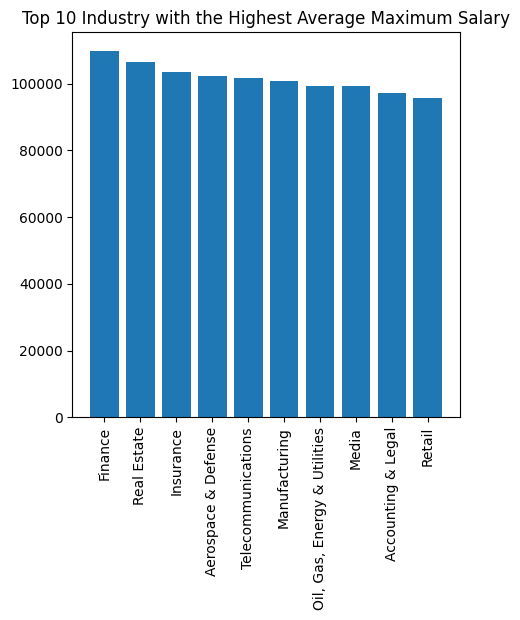

In [22]:
plt.figure(figsize = (5,5))
plt.bar(top_10_industry_max.index , top_10_industry_max.values)
plt.xlabel ='Industry'
plt.ylabel = 'Average Maximum Salary'
plt.title('Top 10 Industry with the Highest Average Maximum Salary')
plt.xticks(rotation = 90)
plt.show()

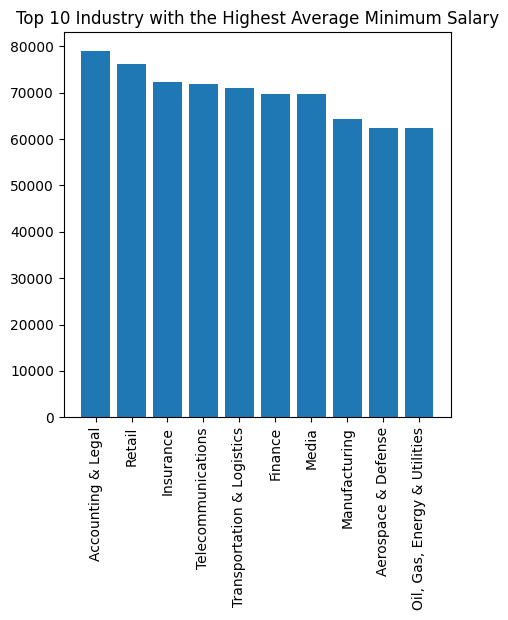

In [23]:
plt.figure(figsize = (5,5))
plt.bar(top_10_industry_min.index , top_10_industry_min.values)
plt.xlabel ='Industry'
plt.ylabel = 'Average Minimum Salary'
plt.title('Top 10 Industry with the Highest Average Minimum Salary')
plt.xticks(rotation = 90)
plt.show()

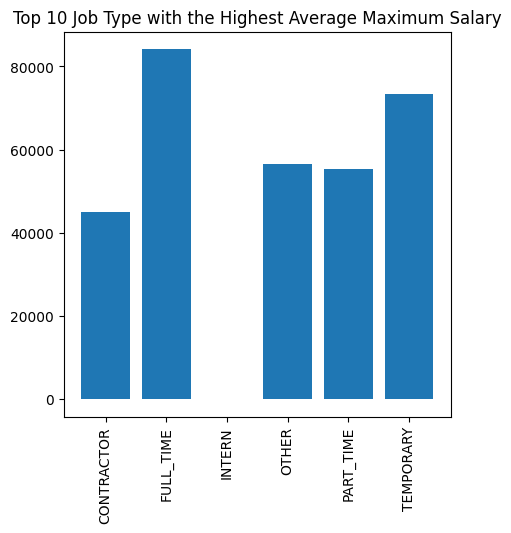

In [24]:
plt.figure(figsize = (5,5))
plt.bar(top_10_jobtype_max.index , top_10_jobtype_max.values)
plt.xlabel ='Job Type'
plt.ylabel = 'Average Maximum Salary'
plt.title('Top 10 Job Type with the Highest Average Maximum Salary')
plt.xticks(rotation = 90)
plt.show()

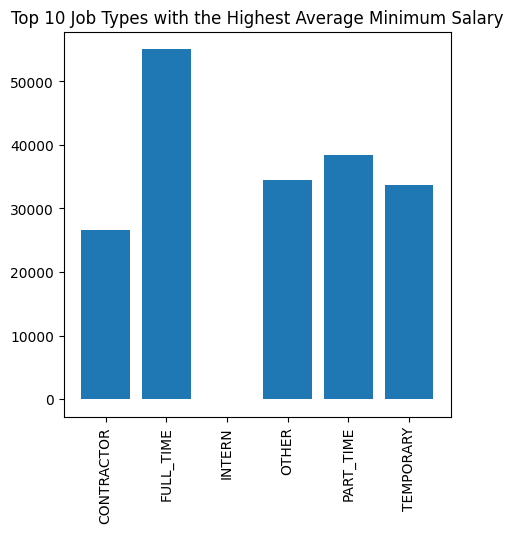

In [25]:
plt.figure(figsize = (5,5))
plt.bar(top_10_jobtype_min.index , top_10_jobtype_min.values)
plt.xlabel ='Job Type'
plt.ylabel = 'Average Minimum Salary'
plt.title('Top 10 Job Types with the Highest Average Minimum Salary')
plt.xticks(rotation = 90)
plt.show()

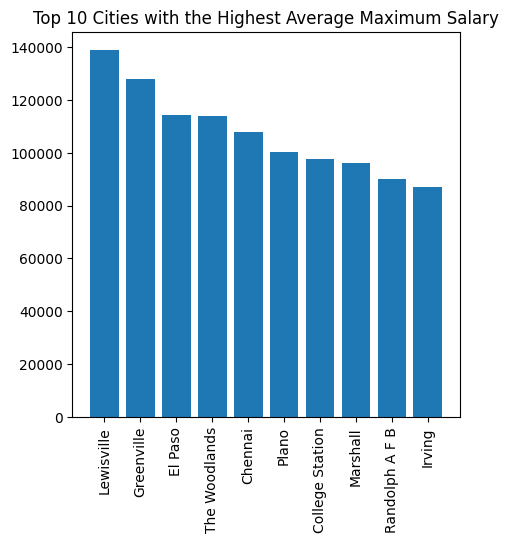

In [26]:
plt.figure(figsize = (5,5))
plt.bar(top_10_cities_max.index , top_10_cities_max.values)
plt.xlabel ='City'
plt.ylabel = 'Average Maximum Salary'
plt.title('Top 10 Cities with the Highest Average Maximum Salary')
plt.xticks(rotation = 90)
plt.show()

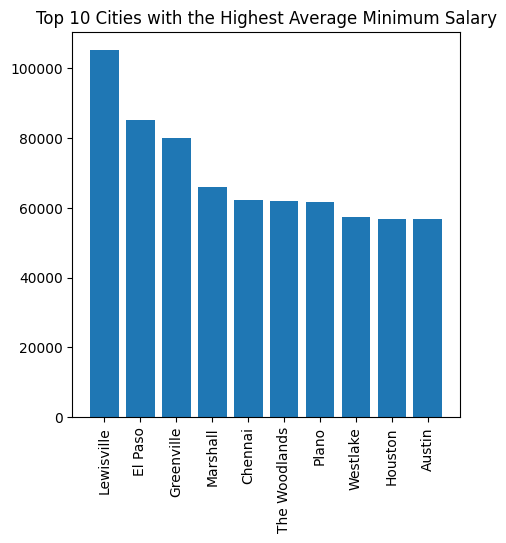

In [27]:
plt.figure(figsize = (5,5))
plt.bar(top_10_cities_min.index , top_10_cities_min.values)
plt.xlabel ='City'
plt.ylabel = 'Average Minimum Salary'
plt.title('Top 10 Cities with the Highest Average Minimum Salary')
plt.xticks(rotation = 90)
plt.show()

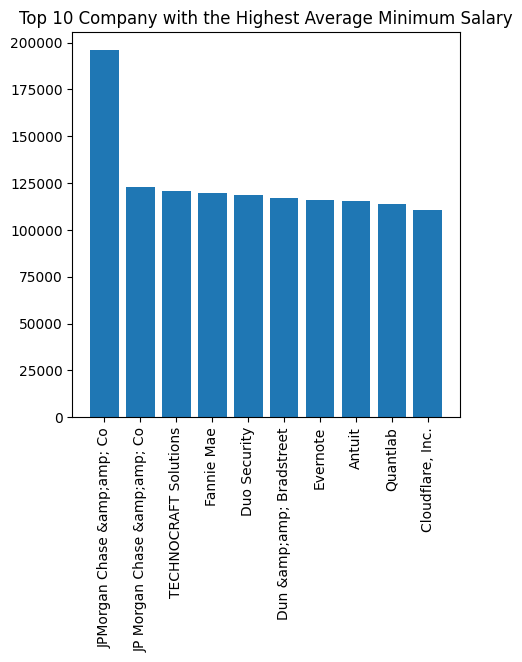

In [28]:
plt.figure(figsize = (5,5))
plt.bar(top_10_comp_min.index , top_10_comp_min.values)
plt.xlabel ='Company'
plt.ylabel = 'Average Minimum Salary'
plt.title('Top 10 Company with the Highest Average Minimum Salary')
plt.xticks(rotation = 90)
plt.show()

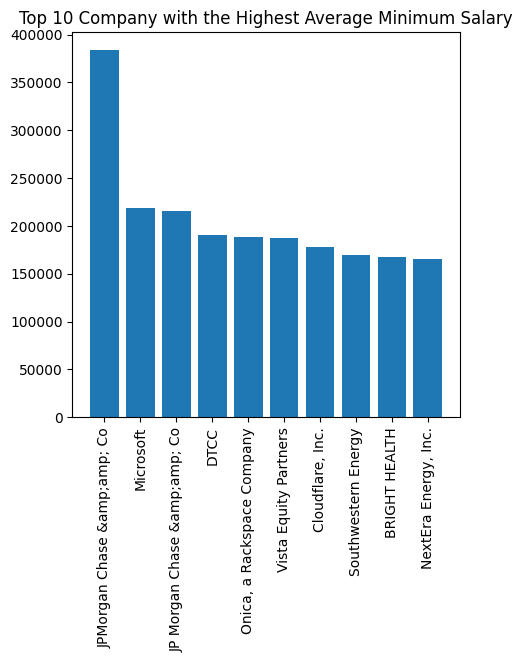

In [29]:
plt.figure(figsize = (5,5))
plt.bar(top_10_comp_max.index , top_10_comp_max.values)
plt.xlabel ='Company'
plt.ylabel = 'Average Minimum Salary'
plt.title('Top 10 Company with the Highest Average Minimum Salary')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have imported the necessary libraries and executed the code to calculate top_10_cities_max

# Create a bar plot
plt.figure(figsize=(10, 6))
top_10_cities_max.plot(kind='bar')
plt.title('Top 10 Cities with Highest Average Maximum Salary')
plt.xlabel('City, Job Type')
plt.ylabel('Average Maximum Salary')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()
